In [52]:
library(ggplot2)
library(ggrepel)
library(RColorBrewer)

In [ ]:
#import collapsed genetable
genetable_collapsed <- na.omit(read.table('hl60_exp1/DAC_genetable_collapsed.txt', header = FALSE, #skip = 4, 
                                  sep = '\t', na.strings = ' '))

genetable_collapsed[4,3:length(genetable_collapsed)] = apply(genetable_collapsed[1:4,3:length(genetable_collapsed)], 2, paste, collapse="_")
colnames(genetable_collapsed) <- genetable_collapsed[4,]
genetable_collapsed = genetable_collapsed[5:dim(genetable_collapsed)[1],]

In [95]:
#create dataframe with pseudogene phenotypes
is_pseudo <- data.frame(subset(genetable_collapsed, grepl('pseudo', genetable_collapsed[[1]], fixed = TRUE)))
head(is_pseudo, n = 3)


,gene,transcripts,gamma_Rep1_Mann.Whitney.p.value_,gamma_Rep1_average.phenotype.of.strongest.3_,gamma_Rep1_sgRNA.count_MW_,gamma_Rep1_sgRNA.count_avg_,gamma_Rep2_Mann.Whitney.p.value_,gamma_Rep2_average.phenotype.of.strongest.3_,gamma_Rep2_sgRNA.count_MW_,gamma_Rep2_sgRNA.count_avg_,⋯,tau_Rep1_sgRNA.count_MW_,tau_Rep1_sgRNA.count_avg_,tau_Rep2_Mann.Whitney.p.value_,tau_Rep2_average.phenotype.of.strongest.3_,tau_Rep2_sgRNA.count_MW_,tau_Rep2_sgRNA.count_avg_,tau_ave_Rep1_Rep2_Mann.Whitney.p.value_,tau_ave_Rep1_Rep2_average.phenotype.of.strongest.3_,tau_ave_Rep1_Rep2_sgRNA.count_MW_,tau_ave_Rep1_Rep2_sgRNA.count_avg_
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
20529,pseudo_0,pseudo_transcript_0,0.327683342342,-0.00659828650937,5,5,0.667055571385,-0.00863199119747,5,5,⋯,5,5,0.638818108629,-0.0453799630432,5,5,0.556077614854,0.0315103362483,5,5
20530,pseudo_0,pseudo_transcript_1,0.375569220231,0.0268933689371,5,5,0.497816131692,0.0357622936649,5,5,⋯,5,5,0.874580868937,-0.0518141091175,5,5,0.859065246448,0.0850679122614,5,5
20531,pseudo_1,pseudo_transcript_0,0.225430447385,-0.0323607960326,5,5,0.137166976763,-0.0408037841673,5,5,⋯,5,5,0.546525158533,0.0928268660983,5,5,0.525121329171,-0.0299916969631,5,5


In [102]:
draw_threshold_neg <- function(x) {
    -6*sd(is_pseudo$V29)/x
}

draw_threshold_pos <- function(x) {
    6*sd(is_pseudo$V29)/x
}

In [44]:
no_negs <- subset(genetable_collapsed, !(genetable_collapsed$V1 %in% is_pseudo$V1))

In [45]:
no_negs$cat[no_negs$score >= threshold] <- 'resistance_hit'
no_negs$cat[no_negs$score <= -threshold] <- 'sensitizing_hit'

In [46]:
no_negs$cat[is.na(no_negs$cat)] <- 'gene_non_hit'

# row.names(no_negs) <- no_negs[[1]]

# no_negs_res <- no_negs[c('DCK', 'SLC29A1', 'METTL3', 'YTHDF2', 'KIAA1429', 'CBLL1', 'ZC3H13'),]
# no_negs_res$cat2 <- ifelse(no_negs_res[[1]] %in% c('DCK', 'SLC29A1'), 'drug', 'm6a')

no_negs_res <- no_negs[no_negs$V1 %in% c('DCK', 'SLC29A1'),]

# no_negs_sens <- no_negs[c('BCL2', 'MCL1', 'DCP2', 'DCPS', 'EDC3', 'DCP1A', 'CMTR2', 'LSM14A', 'CSDE1', 'PUM1', 'ZC3H18'),]
# no_negs_sens$cat2 <- ifelse(no_negs_sens[[1]] %in% c('BCL2', 'MCL1'), 'bcl2', 'decap')

no_negs_sens <- no_negs[no_negs$V1 %in% c('BCL2', 'DCP2', 'DCPS', 'EDC3', 'DCP1A'),]

no_negs_labels <- rbind(no_negs_res, no_negs_sens)

head(no_negs_labels, n = 15)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V31,V32,V33,V34,V35,V36,V37,V38,score,cat
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>
4493,DCK,P1P2,0.1711911836,-0.019706430,5,5,0.0903471451,-0.04707746,5,5,⋯,0.0496449982,1.70355688,5,5,0.0275618366,1.68043701,5,5,-3.155634,gene_non_hit
16154,SLC29A1,P1,0.8986556892,-0.001363240,5,5,0.3398093315,-0.01418492,5,5,⋯,0.0241662394,0.80357693,5,5,0.0150676336,0.77737537,5,5,1.787182,gene_non_hit
16155,SLC29A1,P2,0.9910044669,0.001921249,5,5,0.0744301632,-0.05171819,5,5,⋯,0.5362949333,-0.06560738,5,5,0.7237457136,-0.06255094,5,5,NaN,gene_non_hit
1544,BCL2,P1P2,0.0001577018,-0.168249129,5,5,0.0003828972,-0.13107901,5,5,⋯,0.0002051081,-1.31212295,5,5,0.0001310251,-1.28783542,5,5,NaN,gene_non_hit
4502,DCP1A,P1P2,0.0979566908,0.058876687,5,5,0.2895265222,0.05604628,5,5,⋯,0.0391703860,-0.25497741,5,5,0.0158130597,-0.15941134,5,5,NaN,gene_non_hit
4504,DCP2,P1P2,0.0009382066,-0.085193465,5,5,0.0008586697,-0.08983859,5,5,⋯,0.0001474532,-0.90840775,5,5,0.0001373871,-0.90538976,5,5,NaN,gene_non_hit
4505,DCPS,P1P2,0.0006014742,-0.236192874,4,4,0.0005832183,-0.36243741,4,4,⋯,0.0007768871,-1.12242160,4,4,0.0005517381,-1.25462335,4,4,NaN,gene_non_hit
5191,EDC3,P1P2,0.0580442882,0.028292581,5,5,0.0169293615,0.06306404,5,5,⋯,0.1657699904,-0.38040577,5,5,0.1443487400,-0.16694620,5,5,NaN,gene_non_hit


In [50]:
# reorder factors
no_negs_labels$cat <- factor(no_negs_labels$cat, levels = c('sensitizing_hit', 'resistance_hit'))

Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
ERROR while rich displaying an object: Error: Must request at least one colour from a hue palette.

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is

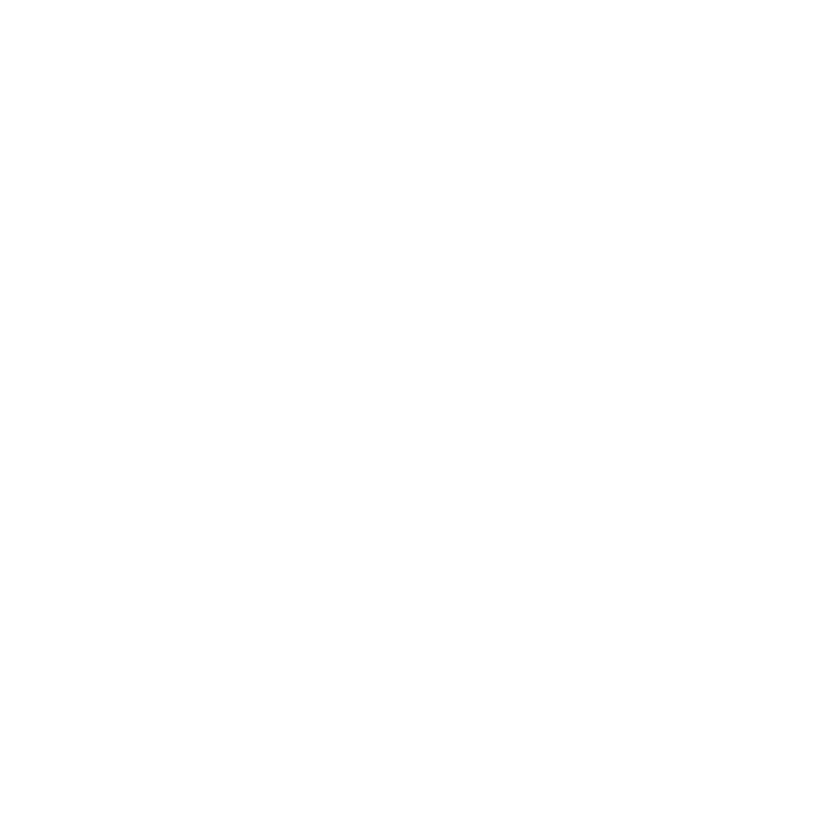

In [49]:
p <- ggplot(no_negs, aes(x = V29, y = -1 * log(V28, 10), label = V1)) +
geom_point(data = no_negs, size = 1, color = 'gray90') +
geom_point(data = resistance_hits, size = 1, color = '#fcae91') + 
geom_point(data = sensitivity_hits, size = 1, color = '#bdd7e7') +
theme_classic() +
xlim(-1.0, 1.0) +
scale_y_continuous(limits = c(0.5,4.7)) +
xlab(expression('CRISPRi decitabine phenotype (' * rho * ')')) +
ylab(expression('-log'[10] * '(Mann-Whitney p-value)')) +
theme(axis.text.x = element_text(size = 15, color = 'black'),
      axis.text.y = element_text(size = 15, color = 'black'),
      axis.title.x = element_text(size = 20),
      axis.title.y = element_text(size = 20),
      legend.title = element_blank(),
      legend.text = element_text(size = rel(1.5), color = 'black'),
      legend.position = 'bottom'
      ) +

# stat_function(fun = draw_threshold_neg, linetype = 'dashed', color = 'black') +
# stat_function(fun = draw_threshold_pos, linetype = 'dashed', color = 'black') +

geom_point(data = no_negs_labels, aes(shape = cat, color = cat), size = 3) #+

# # scale_color_manual(values = c('#3182bd', '#3182bd', '#de2d26', '#de2d26'),
# #                    labels = c('BCL-2 family', 'mRNA decapping', 'Drug metabolism', 'RNA methylation')) +

# scale_color_manual(values = c('#3182bd', '#de2d26'),
#                    labels = c('Sensitizing Hits', 'Resistance Hits')) +

# # scale_shape_manual(values = c(16, 16, 16, 16), 
# #                    labels = c('BCL-2 family', 'mRNA decapping', 'Drug metabolism', 'RNA methylation')) +

# scale_shape_manual(values = c(16, 16), 
#                    labels = c('Sensitizing Hits', 'Resistance Hits')) +

# # geom_text_repel(data = no_negs[c('METTL3'),], 
# #                 color = 'black', size = 4.5, nudge_x = 0.22, nudge_y = -0.12) +

# geom_text_repel(data = no_negs[c('DCK'),], 
#                 color = 'black', size = 4.5, nudge_x = -0.12, nudge_y = 0.01,
#                 min.segment.length = 10) +

# geom_text_repel(data = no_negs[c('SLC29A1'),], 
#                 color = 'black', size = 4.5, nudge_x = 0.12, nudge_y = -0.18,
#                 min.segment.length = 10) +

# geom_text_repel(data = no_negs[c('BCL2'),],
#                 color = 'black', size = 4.5, nudge_x = -0.15, nudge_y = 0.02) +

# # geom_text_repel(data = no_negs[c('MCL1'),],
# #                 color = 'black', size = 4.5, nudge_x = -0.15, nudge_y = -0.15) +

# geom_text_repel(data = no_negs[c('DCP2'),],
#                 color = 'black', size = 4.5, nudge_x = 0.12, nudge_y = 0.12,
#                 min.segment.length = 10) +

# geom_text_repel(data = no_negs[c('DCPS'),],
#                 color = 'black', size = 4.5, nudge_x = -0.3, nudge_y = 0.15) +

# geom_text_repel(data = no_negs[c('DCP1A'),],
#                 color = 'black', size = 4.5, nudge_x = -0.25, nudge_y = -0.25) +

# geom_text_repel(data = no_negs[c('EDC3'),],
#                 color = 'black', size = 4.5, nudge_x = -0.2, nudge_y = -0.1)

# p

# ggsave('fig1_volcano_v2_ray.eps', width = 5.5, height = 6)
p

In [17]:
#for ray
no_negs <- subset(genetable_collapsed, !(genetable_collapsed$V1 %in% is_pseudo$V1))

no_negs$cat[no_negs$score >= threshold] <- 'resistance_hit'
no_negs$cat[no_negs$score <= -threshold] <- 'sensitizing_hit'

no_negs$cat[is.na(no_negs$cat)] <- 'gene_non_hit'

row.names(no_negs) <- no_negs[[1]]

no_negs_res <- no_negs[c(),]
#no_negs_res$cat2 <- ifelse(no_negs_res[[1]] %in% c('DCK', 'SLC29A1'), 'drug', 'm6a')

no_negs_sens <- no_negs[c('TAF6L', 'SUPT20H', 'CCDC101', 'USP22'),]
no_negs_sens$cat2 <- ('saga')

no_negs_labels <- rbind(no_negs_res, no_negs_sens)

head(no_negs_labels, n = 15)

Warning message:
“non-unique values when setting 'row.names': ‘A1BG’, ‘AARSD1’, ‘ABAT’, ‘ABCA7’, ‘ABCB9’, ‘ABCC11’, ‘ABCF1’, ‘ABHD14B’, ‘ABL2’, ‘ABO’, ‘ACACB’, ‘ACBD4’, ‘ACE’, ‘ACHE’, ‘ACIN1’, ‘ACKR3’, ‘ACOT11’, ‘ACOX2’, ‘ACOX3’, ‘ACP5’, ‘ACSL5’, ‘ACSL6’, ‘ACTA1’, ‘ACTA2’, ‘ACTG2’, ‘ACY3’, ‘ACYP1’, ‘ADAMTS1’, ‘ADAMTS16’, ‘ADAR’, ‘ADAT3’, ‘ADK’, ‘ADORA3’, ‘ADPRHL1’, ‘AFP’, ‘AGBL1’, ‘AGBL5’, ‘AGPAT1’, ‘AHCYL1’, ‘AHNAK’, ‘AHNAK2’, ‘AIFM3’, ‘AIM1L’, ‘AKAP12’, ‘AKAP3’, ‘AKNA’, ‘AKR1C2’, ‘ALB’, ‘ALDH1A3’, ‘ALDOB’, ‘ALPL’, ‘AMIGO3’, ‘AMN’, ‘AMPD2’, ‘ANKRD23’, ‘ANKRD34A’, ‘ANKRD34B’, ‘ANKRD44’, ‘ANKRD65’, ‘ANKRD7’, ‘ANPEP’, ‘AOC1’, ‘AOX1’, ‘AP2M1’, ‘APC’, ‘APC2’, ‘APOBR’, ‘APOH’, ‘APTX’, ‘AQP3’, ‘ARAP1’, ‘ARF5’, ‘ARF6’, ‘ARHGAP27’, ‘ARHGAP4’, ‘ARHGAP8’, ‘ARHGEF1’, ‘ARHGEF35’, ‘ARHGEF37’, ‘ARID1B’, ‘ARL6IP1’, ‘ARPC2’, ‘ARPC3’, ‘ARPC4-TTLL3’, ‘ARPC5L’, ‘ARRDC2’, ‘ART3’, ‘ARTN’, ‘ARVCF’, ‘ARX’, ‘ASB11’, ‘ASB12’, ‘ASPG’, ‘ATF7IP’, ‘ATP1A2’, ‘ATP1A4’, ‘ATP2B2’, ‘ATP4A’, ‘ATP5A1’, ‘ATP5J2-PTCD1’, ‘A

ERROR: Error in `.rowNamesDF<-`(x, value = value): duplicate 'row.names' are not allowed


In [18]:
p <- ggplot(no_negs, aes(x = V29, y = -1 * log(V28, 10), label = V1)) +
geom_point(data = no_negs, size = 1, color = 'gray90') +
geom_point(data = resistance_hits, size = 1, color = '#fcae91') + 
geom_point(data = sensitivity_hits, size = 1, color = '#bdd7e7') +
theme_classic()+
xlim(-1.0, 1.0) +
scale_y_continuous(limits = c(0.5,4.7)) +
xlab(expression('CRISPRi DNMTi phenotype (' * rho * ')')) +
ylab(expression('-log'[10] * '(Mann-Whitney p-value)')) +
theme(axis.text.x = element_text(size = 15, color = 'black'),
      axis.text.y = element_text(size = 15, color = 'black'),
      axis.title.x = element_text(size = 20),
      axis.title.y = element_text(size = 20),
      legend.title = element_blank(),
      legend.text = element_text(size = rel(1.5), color = 'black'),
      legend.position = 'none'
      ) +

stat_function(fun = draw_threshold_neg, linetype = 'dashed', color = 'black') +
stat_function(fun = draw_threshold_pos, linetype = 'dashed', color = 'black')+

geom_point(data = no_negs_labels, shape = 16, color = '#3182bd', size = 4) +

geom_text_repel(data = no_negs[c('SUPT20H'),], 
                color = 'black', size = 4.5, nudge_x = -0.3, nudge_y = 0.05) +

geom_text_repel(data = no_negs[c('TAF6L'),], 
                color = 'black', size = 4.5, nudge_x = -0.2) +

geom_text_repel(data = no_negs[c('USP22'),], 
                color = 'black', size = 4.5, nudge_x = -0.25, nudge_y = -0.27) +

geom_text_repel(data = no_negs[c('CCDC101'),], 
                color = 'black', size = 4.5, nudge_x = -0.4, nudge_y = -0.1)

p

ggsave(file = 'ray_volcano_plot_v2.eps', height = 5.5, width = 5.5)

ERROR: Error in fortify(data): object 'no_negs_labels' not found
